In [1]:
import json
import pandas as pd

with open("../data/interim/comedy_preprocessed.json", "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data)
df.head()

,url,comedian,special,transcript,text_clean,text_lower
0,https://scrapsfromtheloft.com/comedy/conan-obr...,Conan O'Brien,None,Conan O’Brien: The Kennedy Center Mark Twain P...,Conan O’Brien: The Kennedy Center Mark Twain P...,conan o’brien: the kennedy center mark twain p...
1,https://scrapsfromtheloft.com/comedy/cristela-...,Cristela Alonzo,None,Cristela Alonzo: Middle Classy (2022) | Full t...,Cristela Alonzo: Middle Classy (2022) | Full t...,cristela alonzo: middle classy (2022) | full t...
2,https://scrapsfromtheloft.com/comedy/dave-chap...,Dave Chappelle,None,Dave Chappelle: The Unstoppable (2025)Release ...,Dave Chappelle: The Unstoppable (2025)Release ...,dave chappelle: the unstoppable (2025)release ...
3,https://scrapsfromtheloft.com/comedy/dave-smit...,Dave Smith,None,Part of the ProblemEpisode number:1306Premiere...,Part of the ProblemEpisode number:1306Premiere...,part of the problemepisode number:1306premiere...
4,https://scrapsfromtheloft.com/comedy/david-spa...,David Spade,None,David Spade: Dandelion (2025) [cheers and appl...,David Spade: Dandelion (2025) <APPLAUSE> Nice....,david spade: dandelion (2025) <applause> nice....


In [2]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

df["sentiment"] = df["text_clean"].apply(
    lambda x: sia.polarity_scores(x)["compound"]
)

df["sentiment"].describe()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


count    28.000000
mean      0.850871
std       0.522820
min      -0.999800
25%       0.995625
50%       0.999350
75%       0.999825
max       1.000000
Name: sentiment, dtype: float64

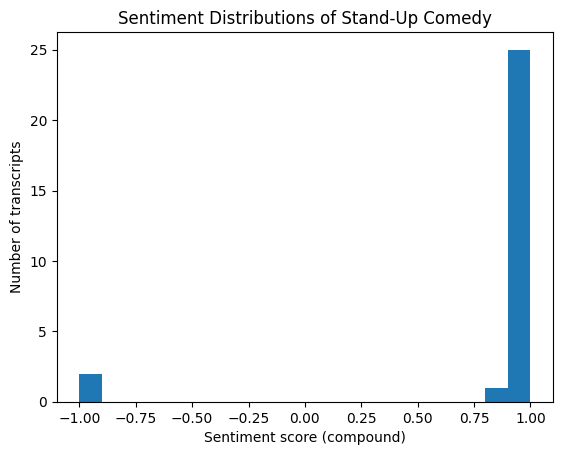

In [3]:
# Visualizing sentiment distribution

import matplotlib.pyplot as plt

plt.hist(df["sentiment"], bins = 20)
plt.xlabel("Sentiment score (compound)")
plt.ylabel("Number of transcripts")
plt.title("Sentiment Distributions of Stand-Up Comedy")
plt.show()

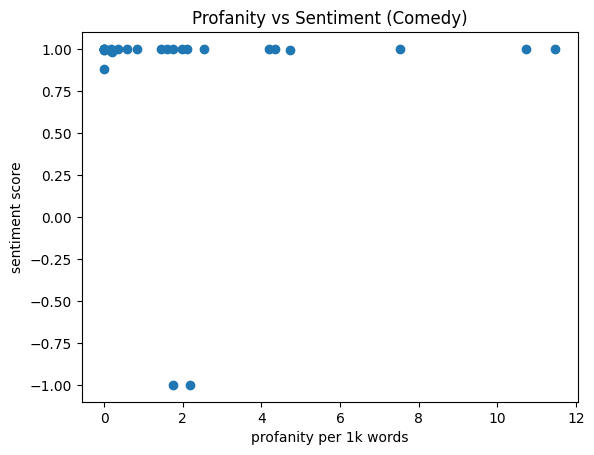

In [5]:
# comparing profanity vs sentiment usage
PROFANITY = {
    "fuck", "shit", "ass", "bitch", "damn", "fucking", "bullshit"
}

df["profanity_count"] = df["text_lower"].apply(
    lambda x: sum(1 for w in x.split() if w in PROFANITY)
)
df["word_count"] = df["text_clean"].str.split().str.len()
df["profanity_per_1k_words"] = (df["profanity_count"] / df["word_count"]) * 1000


plt.scatter(
    df["profanity_per_1k_words"],
    df["sentiment"]
)

plt.xlabel("profanity per 1k words")
plt.ylabel("sentiment score")
plt.title("Profanity vs Sentiment (Comedy)")
plt.show()

- Profanity frequency shows little to no negative correlation with sentiment; most transcripts remain highly positive even at higher profanity rates.
- The sentiment scores exhibit a strong ceiling effect near +1.0, indicating limited sensitivity to tonal differences in comedic language.
- A small number of extreme negative outliers suggest that sustained negative tone not profanity itself drives low sentiment scores.
